In [1]:
import pandas as pd
import json

In [2]:
data = json.loads(open('autism-probas.json', 'r').read())

In [3]:
rows = []
for category in data:
    for dataset in data[category]:
        rows.append({
            "category": category.replace(" ", "-"),
            "dataset": dataset,
            **{
                key: value for key, value in data[category][dataset]['p'].items()
            },
            "gender": "trans+nb",
            **{
                f"gender.{key}": value for key, value in data[category][dataset]['gender'].items()
            },
            **{
                f"autism.{key}": value for key, value in data[category][dataset]['autism'].items()
            }
        })

        rows.append({
            "category": category.replace(" ", "-"),
            "dataset": dataset,
            **{
                key: value for key, value in data[category][dataset]['q'].items()
            },
            "gender": "cis",
            **{
                f"gender.{key}": value for key, value in data[category][dataset]['gender'].items()
            },
            **{
                f"autism.{key}": value for key, value in data[category][dataset]['autism'].items()
            }
        })


In [4]:
rows = list(
    map(
    (lambda row: {
        **{ k:v for k,v in row.items() if not isinstance(v, list)},
        **{ f"{k}.lower":v[0] for k,v in row.items() if isinstance(v, list)},
        **{ f"{k}.upper":v[1] for k,v in row.items() if isinstance(v, list)}
    }),
    rows
    )
)

In [5]:
df = pd.DataFrame.from_records(rows)

In [6]:
dfperc = df.loc[:, [
    'mean-proba', 'median-proba',
    'gender.mean-proba', 'gender.median-proba','autism.mean-proba',
    'autism.median-proba', '95%CI.lower', 'gender.95%CI.lower',
    'autism.95%CI.lower', '95%CI.upper', 'gender.95%CI.upper',
    'autism.95%CI.upper']
].applymap(lambda x: round(100.0*x, 3))

In [7]:
dfperc[['category', 'dataset', 'gender']] = df[['category', 'dataset', 'gender']]

In [8]:
dfperc.to_csv('autism-probas-easy-read.csv', index=False)

In [9]:
df.to_csv('autism-probas-params.csv', index=False)

In [33]:
import seaborn.objects as so
from seaborn import axes_style

In [38]:

p = (
    so.Plot(
        dfperc[dfperc.category == "cisgender-individuals-altogether"],
        x="mean-proba",
        y="dataset",
        color="gender",
        xmin="95%CI.lower",
        xmax="95%CI.upper",
        
    )
    .add(so.Dot(
        pointsize=10,
        marker="d",
        alpha=1,
        edgewidth=1.5,
        ),
        so.Agg(),
        so.Dodge()
        )
    .add(so.Range(linewidth=3.5,alpha=0.7,), so.Dodge())
)

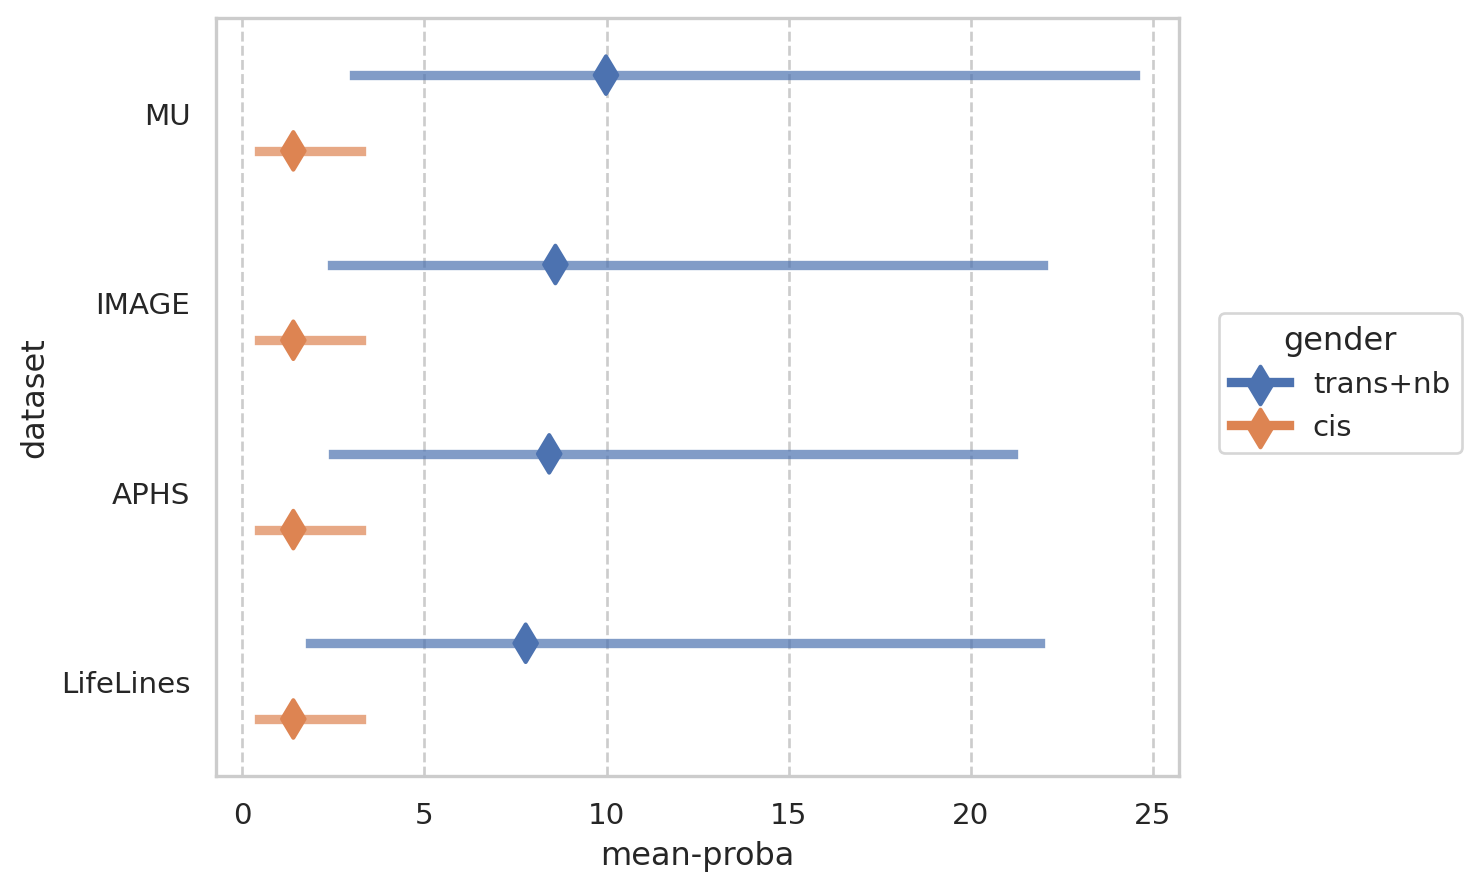

In [39]:
p.theme({**axes_style("whitegrid"), "grid.linestyle": "--"})

In [12]:
df[['median-proba', '95%CI.lower', '95%CI.upper', 'dataset', 'category', 'gender']]

,median-proba,95%CI.lower,95%CI.upper,dataset,category,gender
0,0.067641,0.023919,0.191280,MU,cisgender-males,trans+nb
1,0.012381,0.004703,0.032596,MU,cisgender-males,cis
2,0.079264,0.026451,0.237530,IMAGE,cisgender-males,trans+nb
3,0.012381,0.004703,0.032596,IMAGE,cisgender-males,cis
4,0.056101,0.019182,0.164072,APHS,cisgender-males,trans+nb
5,0.012381,0.004703,0.032596,APHS,cisgender-males,cis
6,0.044876,0.013056,0.154240,LifeLines,cisgender-males,trans+nb
7,0.012381,0.004703,0.032596,LifeLines,cisgender-males,cis
8,0.121701,0.042957,0.344795,MU,cisgender-females,trans+nb
9,0.012381,0.004703,0.032596,MU,cisgender-females,cis


In [13]:
# try to plot the actual distributions



,mean-proba,median-proba,gender.mean-proba,gender.median-proba,autism.mean-proba,autism.median-proba,95%CI.lower,gender.95%CI.lower,autism.95%CI.lower,95%CI.upper,gender.95%CI.upper,autism.95%CI.upper,category,dataset,gender
0,7.786,6.764,0.749,0.721,1.446,1.414,2.392,0.4,1.0,19.128,1.3,2.0,cisgender-males,MU,trans+nb
1,1.399,1.238,0.749,0.721,1.446,1.414,0.470,0.4,1.0,3.260,1.3,2.0,cisgender-males,MU,cis
2,9.272,7.926,0.749,0.721,1.446,1.414,2.645,0.4,1.0,23.753,1.3,2.0,cisgender-males,IMAGE,trans+nb
3,1.399,1.238,0.749,0.721,1.446,1.414,0.470,0.4,1.0,3.260,1.3,2.0,cisgender-males,IMAGE,cis
4,6.517,5.610,0.749,0.721,1.446,1.414,1.918,0.4,1.0,16.407,1.3,2.0,cisgender-males,APHS,trans+nb
5,1.399,1.238,0.749,0.721,1.446,1.414,0.470,0.4,1.0,3.260,1.3,2.0,cisgender-males,APHS,cis
6,5.472,4.488,0.749,0.721,1.446,1.414,1.306,0.4,1.0,15.424,1.3,2.0,cisgender-males,LifeLines,trans+nb
7,1.399,1.238,0.749,0.721,1.446,1.414,0.470,0.4,1.0,3.260,1.3,2.0,cisgender-males,LifeLines,cis
8,14.015,12.170,0.749,0.721,1.446,1.414,4.296,0.4,1.0,34.480,1.3,2.0,cisgender-females,MU,trans+nb
9,1.399,1.238,0.749,0.721,1.446,1.414,0.470,0.4,1.0,3.260,1.3,2.0,cisgender-females,MU,cis
